# Анализ продолжительности жизни по данным кладбища

Опись надписей на памятниках Усманского городского кладбища, 1916 год. [Источник](https://usmanlib.ru/kray/pamyatniki/opis-nadpisej-na-pamyatnikakh-usmanskogo-gorodskogo-kladbishcha-sostavil-v-1916-godu-knyazhinskij-b-p)

In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

В переменной `raw_text` находится список умерших из источника. Предварительно список обработан на опечатки, а также младенцам присвоен 1 год жизни в случаях, если нет никакой информации (допущение, что младенец прожил не более 1 года). Также, там где указаны `дети` тоже присвоен 1 год, где они похоронены в одной могиле с родителями без указания информации о годах жизни.

In [37]:
raw_text = """
Августа, монахиня, скончалась 22 сентября 1892 года
Агафия, блаженная раба Божия, скончалась 24 июля 1871 года. Б, скончалась 1871 года июля 24 дня».
Агафья, монахиня, скончалась 21 февраля 1908 года, 52 лет
Алексеева Вера Николаевна, скончалась в 1872 году
Алексеев Алексей Алексеевич, скончался в 1876 году.
Алексеев Пётр Александрович, скончался 18 декабря 1913 года, 66 лет.
Алексейцева Пелагея, скончалась 11 июня 1916 года, 51 год
Алексейцев Николай Васильевич, скончался 6 ноября 1910 года, 65 лет, Липецкий мещанин.
Алмазов Ефим Петрович, священник, скончался 18 марта 1850 года на 31 году жизни. «Дни смертного, как трава, как цветы на поле, так он цветет. Умоляю вас, братия, Господом нашим Иисусом Христом и любовию Духа, подвизаться со мною в молитвах за меня к Богу».
Алымов Иван Федорович, родился 10 ноября 1859, скончался 8 августа 1903 года, 44 лет.
Алымов Пётр Андреевич, скончался 5 декабря 1911 года. «Одна надежда на спасенье, одно прибежище моё, одно святое Провиденье и будет помощь для меня. Так спи, мой друг, пока трубою Ангел в небе восгремит и умерших всех с тобою на новый подвиг воскресит. Прими, Господи в святую обитель, и в недрах неба упокой, и пусть мира сего житель в раю блаженствует с Тобой. А мне, тоскующей пусть будет утехой памятник здесь твой. К нему ходить я часто буду этой… тропой».
Аксенов Константин Викторович, лесничий Усманского городского участка
Ангелина, монахиня, скончалась в 1908 году, погребена 2 февраля. «От племянницы Е. Ждановой».
Андреева Агрипина Андревна
Андреева Дарья, скончалась, 9 ноября 1906 года
Андреева Людмила Захаровна, урожденная Бурмакина, жена коллежского секретаря, скончалась ночью с 15 на 16 сентября 1881 года, 29 лет.
Андреева Надежда Васильевна
Андреева Мария Васильевна, см. Муратова
Андреева Мария Афин., /урожденная Рудницкая
Андреев Василий Георгиевич, коллежский асессор, родился 25 марта 1792 года, скончался 18 февраля 1866 года. «Отцу благодетелю».
Андреев Иван Андреевич
Андреев Иван Емельянович, усманский мещанин, скончался 15 июля 1911 года, 58 лет.
Андреев Константин Андреевич, почтальон, скончался 13 мая 1906 года на 61 году
Андреев Митрофан Иванович, скончался 13 апреля 1883 года, 50 лет.
Андреев Яков Иванович, родился 20 октября 1830, скончался 10 января 1863 года. «Здесь сокрыта отрада наших дней. От искренних жены и сестры Андреевых»
Аникина Анна Яковлевна, скончалась 29 января 1900 года, 57 лет
Аникин Николай Иванович, скончался 22 мая 1911 года, 62 лет.
Аничкина – Платонова Варвара Александровна, врач, урожденная Ганина, родилась 10 февраля 1850 года, скончалась 11 октября 1883 года, от послеродовой горячки. «Она высоким идеалом русской женщины была, красотами небесными душа ее цвела». Некролог, как пионера Высших женских курсов - "Дон" 1884 г, № 115.
Анохин Николай Васильевич, скончался 11 августа 1892 года, 43 лет
Ансерова Анна Николаевна
Ансеров Николай Степанович, был мировым посредником и земским начальником
Аргамакова Анна Егоровна, скончалась 2 мая 1838 года, 48 лет
Аржеухов Дмитрий Иванович, усманский крестьянин, скончался 3 февраля 1887 года
Аржеухов Петр Дмитриевич
Арзамасцева Варвара Михайловна, скончалась 6 мая 1906 года 40 лет
Арзамасцев Антон Карпович, скончался 7 мая 1906 года 47 лет «З.Е.П.Н. Там будут. Л.Ч.И.Я.»
Архипова Ольга Александровна, скончалась 8 июля 1895 года, 10 лет. Уроженка г. Петергофа.
Архипов Дмитрий Алексеевич, надворный советник, скончался 19 октября 1902 года
Ахлебинина Анна Васильевна, родилась 8 сентября 1837 года, скончалась 22 июня 1901 года, жена Ахлебинина Василия Федоровича
Ахлебинин Василий Федорович, родился 24 декабря 1831 года, скончался 25 января 1898 года
Асташова Евдокия Ивановна, скончалась 20 января 1912 года
Асташова Параскева, скончалась 15 октября 1907 года, 43 года 11 мес.
Бабин Фёдор Егорович, скончался 22 ноября 1908 года , 58 лет
Баженова Елена Петровна, /см. Писарева
Баженова Зинаида Николаевна , скончалась 11 мая 1896 года, на 23 году
Баженов Николай Константинович, скончался 14 марта 1900 года, 61 год
Баталина Мария Спиридоновна, скончалась 3 января 1911 года, 57 лет
Баталин Алексей Петрович, почетный гражданин, скончался в 11 часов вечера 23 ноября 1877 года, 29 лет от роду.
Баталин Алексей Алексеевич, отрок, умер 20 сентября, 1887 года
Бланк Борис Григорьевич, скончался 3 мая 1907 года, городской судья г. Усмани
Бабикова Екатерина Андреевна, скончалась 5 февраля 1897 года, 80 лет
Беляева Евдокия Ионовна, жена врача, скончалась 16 августа 1855 года, 39 лет
Бобров Андрей Васильевич, скончался 12 июня 1912 года, певчий
Богомолова Александра Васильевна, усманская мещанка, скончалась 4 января 1898 года
Богомолова Екатерина Яковлевна, скончалась 31 декабря 1870 года
Богомолова Мария, младенец, скончался в 1861 году, 1 год
Богомолова Ольга Степановна, родилась 8 июля 1856, скончалась 20 августа 1913 года
Богомолов Алексей Егорович, родился 15 марта 1852 , скончался 8 октября 1899 года
Богомолов Егор Данилович, скончался 7 октября 1871 года, 57 лет
Богомолов Пётр Матвеевич, скончался 5 июня 1912 года, 73 лет.
Богомолов Иван Данилович, скончался 1861 год. «От детей благодарных незабвенному родителю». /городской голова 1852-1854 гг./
Богословская Елизавета, 1 год
Богословский Николай Николаевичи, 1 год
Богатырева Домника Михайловна, жена усманского купца, родилась 8 января 1876, скончалась в 10 часов 15 минут 29 января 1894 года
Богатырева Софья Ильинична, девица, 18 лет
Боевых Ефросинья Савельевна, скончалась 26 октября 1906 года, 71 год
Бокунова Татьяна Филаретовна, скончалась 7 октября 1899 года, 24 года
Бокунов Александр Алексеевич, скончался 31 октября 1899 года, 21 год
Бокунов Михаил Афанасьевич, скончался 23 августа 1902 года, 53 лет
Болотова Мария Филипповна, скончалась 17 сентября 1892 года 58 лет
Болтенкова Екатерина Андреевна «От любимых детей дорогй матери»
Болховитина Елена Петровна, усманская мещанка, дети ее
Болховитина Елизавета, 1 год
Болховитина Мария, 1 год
Болховитина Анна, 1 год
Болховитина Мария, 1 год
Болховитина Александра, 1 год
Болховитина Клавдия Дети Болховитиной Елены Петровны.
Болховитинова Софья Александровна, скончалась 24 декабря 1903 года
Борисов Иван Иванович, скончался 5 февраля 1908 года
Бош Ольга-Шарлотта-Юлия, дочь Арнольда Бранд, родилась 19 октября 1833, скончалась 10 декабря 1894 года
Бреславская Наталия Ивановна, скончалась 22 сентября 1897 года, 72 лет
Бреславский Александр Григорьевич, скончался 2 октября 1878 года, 68 лет
Бреславский Василий Александрович, скончался 23 сентября 1905 года, 59 лет
Бреславский Иван Лукич, скончался 9 октября 1910 года
Буримович Ольга Афанасьевна, см. Юстова
Буримович Николай Афанасьевич, скончался 1 ноября 1910 года
Бурмакина Людмила Захаровна / см. Андреева
Бурмитсрова Евдокия, родилась 1877 скончалась 29 декабря 1902 года
Бурмистров Иван Петрович, скончался 11 мая 1912 года, 40 лет
Бутовцев Михаил Иванович, младенец скончался 6 августа 1890 года, 1 год, деревни Готовцы Владимирской губернии
Бутыриа Евдокия Филипповна, жена купца, скончалась 14 мая 1904 года
Бутырин Василий Николаевич, усманский купец родился 28 февраля 1847, скончался 6 декабря 1894 года
Быков Конон Васильевич, воин, скончался 27 января 1909 года
Бычкова Татьяна Николаевна, девица, скончалась 6 сентября 1906 года, 18 лет
Бычков Николай Мартинович, скончался 1 марта 1903 года, 62 лет
Вагнер Евгений Александрович, капитан, родился 21 апреля 1850 года
Ваксман Евгений Порфирьевич, скончался 25 июля 1901 года, 68 лет
Васильева Екатерина С. Скончалась 10 ноября 1903 года, 95 лет
Васильев Гавриил Александрович, гражданин Воронежской губернии, Бирюческого уезда, слободы Алексеевка, скончался 1857 год, 34 лет
Васильев Василий Никитович, скончался 18 октября 1901 года, в 7 часов вечера
Васильев Николай Васильевич, фельдшер, родился 12 августа 1848, скончался 16 июня
Васильев Владимир, 1 год
Васильев Зинаида, 1 год
Васильев Николай, 1 год
Васильев Вера, 1 год
Васильев Павел Петрович, родился 30 июня 1885, скончался в апреле 1903 года
Василькова Александра Ивановна, скончалась 25 июня 1841 года 15 лет
Василькова Мария Борисовна, скончалась 3 марта 1835 года 35 лет
Василькова /урожденная/ Прасковья Ивановна, скончалась 21 сентября 1860 года, 37 лет
Васильков Иван Иванович скончался 6 января 1845 года, 54 лет
Wegrzyowski Karol Tomas родился 1836, скончался 1902
Вельяминова Лидия Константиновна
Вельяминов Николай Витальевич, родился 25 ноября 1855 скончался 2 октября 187.. «Да почиешь ты мирно в ранней могилке своей, и да воскресит тебя Господь Бог в последний день на суд или осуждение, но в прославление Его бесконечной благости во Царствии Своем»
Вендеревская Пелагея Абрамовна, скончалась 30 сентября 1909 года, 80 лет
Вендеревский Николай Платонович, скончался 21 мая 1913 года, 46 лет
Винокурова Пелагея Петровна, скончалась 30 сентября 1909 года, 80 лет
Винокурова Анна Степановна, урожденная Милованова, родилась 11 марта 1849, скончалась 3 июня 1871 года, жена А.П. Винокурова
Винокурова Екатерина Георгиевна, родилась 20 ноября 1875, скончалась 22 марта 1893 года, на второй день Пасхи
Винокурова Александра Фёдоровна, скончалась 10 августа 1904 года
Винокурова Надежда, родилась 31 июля 1876, скончалась 30 сентября 1887 года
Винокурова Татьяна Ивановна, родилась 10 января 1803 , скончалась 31 января 1841 года, жена Алексея Филипповича Винокурова
Винокуров Алексей Филиппович, усманский купец, родился 7 марта 1801, скончался 7 октября 1847 года, муж Татьяны Ивановны Винокуровой
Винокуров Иван Алексеевич, усманский купец, родился 27 октября 1843, скончался 28 сентября 1887 года,
Винокурова Ивана Алексеевича
Винокурова Елизавета, 5 лет 9 мес.,
Винокуров Владимир, 10 лет
Винокуров Георгий Алексеевич, родился 1822, скончался 29 января 1878 года.
Винокуров Михаил Петрович, скончался 31 мая 1908 года, 42 лет
Винокуров Павел, родился 25 января 1881, младенец, скончался 30 октября 1887 года
Винокуров Петр Алексеевич, усманский купец, родился 1 октября 1842 скончался 26 октября 1882 года. «Он жил для любви бескорыстной, дружбы, великодушия и никогда не умрет в памяти друзей. Он стоит тех слез, которыми его провожали».
Винокуров Алексий, 1 год
Винокуров Иоанн,  1 год
Винокуров Анфиса,  1 год
Винокуров Анна,  1 год
Винокуров Пётр Алексеевич, скончался 8 января 1899 года, 72 лет
Волбанов Семён, скончался 1 мая 1910 года, 60 лет
Волбенкова Евдокия, скончалась 25 апреля 1916 года
Волкова Феодосия Игнатьевна, скончалась 24 декабря 1911 года, 55 лет
Волков Гавриил Федорович
Волков Фёдор Иванович
Воронкова Устиния Ивановна, скончалась 27 октября 1907 года, 85 лет
Воронов Василий Кондратьевич
Вышковский Михаил Казимирович, усманский уездный врач, надворный советник, скончался 24 июн 1886 года, 52 лет
Вяткин Леонид, скончался 11 сентября 1898 года, 3 лет
Вяжлинский Владимир Константинович, родился 2 мая 1858, скончался 13 мая 1903 года
Ганина Варвара Александровна, см. Аничкова-Платонова
Ганины, дворяне, склеп
Германовская Вера Ивановна, жена Германовского Петра Герасимовича
Германовский Петр Герасимович, капитан
Германова Матрена Илларионовна, скончалась 21 марта 1902 года
Гессинг Апполон Степанович, скончался 22 июля 1893 года.
«Над урной сей не пышный памятник стоит – один лишь крест святой. Здесь скромный труженик лежит, вот почему и крест простой. Не монумент покойника хранит, дела его все сочтены теперь, над ним Господь Свой суд творит, открыв хотя в своем селенье дверь. Спишь, мирно памятью храним до дня всеобщего восстания. Тогда, взлетя с трубой, Херувим разбудит всех для воздаянья. Сестра твоя не перестанет тебя помнить в молитве своей пока жива. Мир памяти твоей!».
Гладнев Василий Иванович, усманский мещанин скончался 15 марта 1913 года, 90 лет
Говядинов Василий Федорович, козловский мещанин, 45 лет
Гончаров Николай Саввич, надворный советник, скончался 23 июня 1911 года, 71 год
Горбунов Павел, младенец, родился 13 июня 1908, скончался 30 декабря 1911 года
Горбунова Пелагея Степановна, родилась 7 октября 1887, скончалась/отравилась 6 июля 1916 года
Горнова Павла Васильевна, родилась 6 февраля 1868, скончалась 25 июня 1909 года
Горнов Василия, диакон, скончался 10 мая 1894 года
Горчаков Никита Ермилович, скончался 4 октября 1912 года
Гостеева Александра Григорьевна, скончалась 12 декабря 1892 года, 48 лет
Гостев Василий Васильевич
Гостев Николай Васильевич
Гостев Фёдор Васильевич
Гостева Зинаида Васильевна, см. Нарышкина
Гребенников Пётр Кирьянович, скончался 21 декабря 1907 года, 42 лет
Громов Василий, священник барского села. Засечен до смерти управляющим за то, что начал в церкви рассказывать крестьянам о близком освобождении от крепостного ига. Управляющий напал на него у входа церкви. Отец Василий был привезен в город полумертвым. Умер в больнице, похоронен около могилы дьякона Данилова.
Гусева Татьяна Егоровна, скончалась 22 февраля 1906 года
Гусев Яков Фролович, скончался 21 января 1890 года.
Гусев Григорий Яковлевич
Dabrovskich Waleri, Adolf, Felix, Wladislav
DabrovskichAlexandra? Скончалась 26 апреля 1916 года
Данилова Иустина
Данилова Екатерина, отрок
Данилов Владимир, священник
Данилов Петр
Данилов Василий Михайлович, диакон, скончался в феврале 1861 года. «Да будет покой в славе, жребий в блаженстве, житие в обителях святых, торжество с ангелами, воздаяние во Христе Иисусе Господе нашем. Аминь. День светлый, угасая, от неба полетит и бродит тень ночная, и небо не горит. Брожу я к могиле и милого зову, но нет уж милых в мире, ни в сне, ни на яву! Могила без ответа, могила всё молчит! И сладкого привета могила не говорит. Так помни Бога всего боле, себя Им управляй. О, слезы, вы горючи, теките из очей! С молитвою о милых, с молитвой и о мне, о, мой ты, сердце в мире, тоскуй и изсыхай. И чаще о могиле ты мне напоминай, к могиле безответной меня ты увлекай! Прохожий! Ты идешь, но ляжешь так, как я , постой и отдохни на камне у меня.. Взгляни, что сделалось со тварью горемычной. Трудился, человек? И прах зарос крапивой! Сорви ж былинку и вспомни обо мне. Я – дома, ты – гостях, подумай о себе. Вот ского, скоро все минется, что час сближается с концом. И спящий во грехах проснется, когда предстанет смерть с мечом. Так старайся быть теперь блаженным человеком..Все поздно для тебя, когда пройдет твой век! Пора домой и в путь сбираться, пора домой – не век скитаться. Наше время кратко – как прошедший час, горько или сладко, все как сон, для нас…Кости зрак – смерти знак. Зри сие, всяк будешь так. Бьют часы, литят минуты! Все пройдет – скорби люты, и забавы – лесть сердец, в мрачном гробе им коней. Отцы прешли в иную обитель, поэтому и я не здешний житель. О, ты, душа моя, покрытая грехом, очистись! Скоро час ударит и над нами. Что нам в золоте с чинами, на что многаго желать? И покрытого крестами будет в гробе червь терзать. О, человек бренный, гость земли мгновенный! Помни смертный час, помни трубный глас, помни страшный суд, помни, не забудь, и гиенскую муку – с Господом разлуку!!! Часто вспоминай и прекрасный рай. Покажив – спасайся, плач, молись, смиряйся, время не теряй. Будь готов и знай, что когда оставишь свет, позван будешь на ответ». Составил диакон Ив. Вас. Данилов
Данилов Владимир, священник
Данилов Иван Васильевич
Данилов Пётр
Демидова Анастасия Тимофеевна
Демидов Василий Иванович
Десницкий Михаил Васильевич, скончался 28 февраля 1909 года
Димитраков Александр Евгеньевич, младенец, родился 27 ноября 1902, скончался 7 октября 1905 года.
Добров Николай Степанович, родился 1839, скончался 31 мая 1905 года
Добров Стефан Васильевич, священник
Добромыслов Н.Г., земской врач в Талицком Чамлыке в 1884-1903 гг.
Домогацкая /Масловская/ Агриппина Васильевна , усманская мещанка
Домогацкий /Масловский/ Николай Дмитриевич, усманский мещанин «Отцу. Подсечен смертною косою в могиле хладной и сырой, пришел ты к вечному покою , и мы идеи все за тобой. Идем мы разными путями, но не минуем этот путь, и ляжем здесь под небесами, от дел житейских отдохнуть. Все дни красущие природы пройдут, придет и смерти сон, пройдут и нашей жизни годы и все уснем мы , как спит он. Ты спишь, возлюбленный родитель, уж непробудным сном своим. Знай, воскресит тебя Спаситель, трубой Архангелов святых. Восстанут мертвые, живые на страшный суд к Святой Судье – тогда сойдутся все родные, тогда увидим мы тебя! Наш век проходит с быстрой силой, ты ждешь и нас к себе.
Матери. Была пора и я ходила кладбище это посещать, смотреть на крестики родных, но я не думала вздыхать. Я думала на свете жить, но вот прошел мой век. Взгляни, прохожий, на мой крест – ты тоже человек.Как ты проходишь по могилам – я тоже так ходила. Ты – там в гостях, а я здесь – дома, я тоже там гостила. Теперь, друзья, просите Бога, чтоб Он меня простил, и душу грешную мою Он в муку не пустил".
Демихов П., скончался 8 сентября 1909 года, 37 лет
Дубовиков Пр, Ал, 1859 год, 21 год
Евсюкова Ксения Кондратьевна, скончалась 18 апреля 1889 года, 38 лет
Евсюков Захарий Иванович, скончался 21 июня 1911 года, 67 лет.
Евсюкова Елизавета, 1 год
Евсюкова Варвара, 1 год
Евсюкова Варвара, 1 год
Евсюкова Пелагея, 1 год
Евсюкова Анна, 1 год
Евсюкова Клавдия, 1 год
Евсюкова Федор, 1 год
Егоров … Алексеевич, скончался 4 февраля 1908 года, 23 лет
Егоров Владимир Дмитриевич, прапорщик убит в 4 часа утра 25 июля 1917 года
Ерилин Сергей Федорович
Ермилова Елена Степановна, жена священника, родилась 8 июня 1853, скончалась 21 августа 1886
Ерофеев Василий К…, скончался 11 августа 1891 года, 75 лет
Ерофеев Григорий Васильевич
Ерофеева Вера
Ефремов Митрофан
Ефремов Павел Иванович, поручик, скончался 29 марта 1860 года
Жданов Фёдор, воин, скончался 18 июля 1896 года 72 лет
Журдан Мария Карловна, / см. Кирсанова
Змиева евдокия Фёдоровна, / см. Шпигоцкая
Золотарева Анисия Филипповна, скончалась 27 января 1878 года, 79 лет
Золотарев Дмитрий Иванович, скончался 25 ноября 1891 года 44 лет
Золотарев Сергей Иванович, скончался 9 декабря 1856 года, 58 лет
Зубков Климент Павлович, усманский мещанин
Зыбин Никита Евдокимович, скончался 1 ноября 1917 года
Иевлев П.Д., скончался 1 марта 1905 года
Иванова Домника Абрамовна
Ивановский Михаил Фёдорович, диакон
Иванов Владимир Иванович, скончался 31 января 1907 года
Иванов Тит Яковлевич, родился 2 апреля 1820, скончался 30 декабря 1886 года
Игнатович Иосиф, беженец, Гродненская губерния
Игнатова Матрона Егоровна, скончалась 16 февраля 1904 года
Игнатов Андрей Игнатович, скончался 16 сентября 1891 года
Иевлев П.Д., скончался 1 марта 1905 года
Кабалова Алекасандра Епинетовна / урожденная Кучина/ 1847-1881 «Была пора и я блистала в одеждах гордости земной, как ландыш чистый расцветала, как роза пышная весной, вздымалась грудь полна желаний, росли надежда и любовь. Но, вот увы, средь упований, угас мой взор, остыла кровь. Сразило смерти всё дыханье, не слышен больше голос мой, одно воспоминанье хранит здесь камень гробовой! г. Усмань.5-VI-1886 г. Ив. Гр. Кабалов»
Кабаловы: Ольга, 8 лет, Николай, 7 мес., Надежда, 1 мес., Надежда, 7 мес., Наталья, 5 мес., Татиана 4 лет, Павел 8 лет, Антонина, 14 лет..
«Не белым стих вы мой зовите
Пора была, и я цвела, как ландыш, раннею весной, как розан майский убрана в одежды гордости земной. Вздымалась грудь полна желаний, росла под веяньем надежды, и вот, увы, средь упований, угас мой взор под спудом вижу. Ни чувств, ни мыслей нет следа, не слышен больше голос мой, и только камень гробовой хранит обычные слова. Печалью взор скользит вокруг, печальны вы, ряды могил, здесь вечным сном уснул твой друг, а тут жена в расцвете сил. И сын, и брат, почили все от шума жизни в тишину. И мнится дух их отлетевший, с тобою мысленно живет, твоим речам как будто внемлет, твои желания следит… А между тем стоишь ты здесь один среди мертвой тишины. Невольно тут с благоговеньем вздохнешь глубоко, загрустишь, и дашь свободу размышленьям о безызвестности судьбы… О том, что можешь быть здесь завтра, и сам ты будешь схоронен.И дума эта давит сердце.. Вновь верит хочется тогда, что есть загробная страна, где наши души обитают в ином таинственном бытии неосязаемых существ. И мудрость Божья пред тобою такой великою предстанет, и так могущество Его ничтожный разум поразит, что зришь и чувствуешь себя совсем иным, как никогда. Ни тени гордости, ни зла, празднословия в устах, но содрогнувшийся умом главу покорную склоня, ты в покаянии немом тщету земную созерцаешь, и умиленною душою, ты просишь милости Творца равно для друга и врага. О Господи, помилуй нас, и упокой усопших дух в Твоей деснице смертной час друзей, врагов, господ и слуг. Да и они помолят там занас пред ними согрешивших, да не забудем смертный час и неизбежность сей могилы. Сей, устрашающий сердца царей, вельмож, господ и слуг, да бы способны были мы отречься зла и суеты. Ив. Гр. Кабалов».
Кабалов Иван Григорьевич, 1844 – 1909 г.г. «Поэт, твой дар сиял зарею меж суеты в житейских снах. Твой дух, взлелеянный мечтою, в цепях страстей в борьбе с толпой, страдал, любил, прощал в слезах.. Умолкнул голос твой любезный, зарыт ты здесь в земле сырой, душа не мир взята надзвездный, взята с земли Творца рукой… О тайне смерти размышляя твои друзья, твоя семья, в могилу прах твой провожая, при блеске солнца в утро мая, внимали песне соловья… То дар души твоей мятежной прощался с грешною землей, и отклик чувств той песни нежной венчал гармонию собой. И. А. Кабалов, 1909»
Кабалов Дмитрий Иванович, прапорщик 5 пехотного Калужского полка. Родился 14 ноября 1896, убит на поле брани в районе м. Сморгань 27 августа 1916 года. «Преклоняемся пред доблестью твоею и храбростью, запечатанный смертью на пользу Отечеству, и тобою гордимся».
Кайдалова Клавдия Павловна, родилась 20 марта 1887 , скончалась 31 мая 1910 года
Кайдалов Борис Григорьевич, скончался 11 августа 1909 года
Кайдалов Григорий Михайлович
Кайдалов Михаил Степанович, скончался 3 августа 1883 года
Калинин Степан, родился 1829, скончался 1903 год
Калугина Софья, жена священника Алексия Калугина
Карандеев Николай Андреевич, скончался 3 июля 1870 года
Карандеева Дарья Николаевна, 17 лет
Карандеева Мария Сергеевна , скончалась 27 марта 1876 года
Карандеева Софья Николаевна, скончалась 8 мая 1877 года
Карякин Николай Васильевич, усманский купец, скончался 6 ноября 1866 года, 44 лет
Карякина Александра, родилась 14 апреля 1836, скончалась 9 ноября 1876 года
Карякина Мария, родилась 26 января 1818, скончалась 9 марта 1871 года
Карякина Николай Антонович, родился 4 февраля 1888, скончался 10 ноября 1911 года
Карякина Пелагея Илларионовна, скончалась 26 апреля 1913 года, в 4 часа дня, 25 лет
Карякина Татьяна Степановна, скончалась 5 января 1867 года, 44 лет, жена купца Н.В.Карякина
Кашицин Серафим Терентьевич, родился 10 августа 1860, скончался 5 августа 1898 года
Кашменский Алексей Никанорович, скончался 1907 год
Кашменский Никанор Яковлевич, коллежский советник , скончался 6 февраля 1891 года, 59 лет. «Незабвенному начальнику Н.Я. Кашменскому от чинов полиции Крутецкого, Тмофеева, Успенского, Беляева».
Квашнина-Самарина Тамара Николаевна, младенец, родилась 6 апреля 1904, скончалась 29 сентября 1905 года. «Спи, малютка дорогая, нас бывало утешая, жаль, недолго ты жила, но осталась вечно нам мила».
Кедрин Михил, священник, скончался 4 ноября 1909 года
Кидинова Екатерина Ивановна /урожденная Коробкина/, скончалась 27 февраля 1908 года
Киреев Д.Т., убит в 1918 году. «Дорогому, безвременно погибшему брату за идеи трудового народа».
Кирсанов Николай Николаевич, потомственный дворянин, титулярный советник, родился 27 декабря 1846, скончался 1 ноября 1907 года в 10 часов вечера. «Не пробуден сон могильный, прах мой милый дорогой! Где возьму я столько силы, чтоб не поакать над тобой !? О, какою та йной дивной твой загробный жребий скрыт, как трудно сон могильный разрушает и живит. Тщетно горькими слезами я здесь плачу. Жребий твой был отгчен здесь - трудами, там – готов тебе покой. С верой в милость Провиденья, над тобою, прах родной, я склонюсь в слезах моленья, Боже, вечный и святой, дух отца в своих селеньях со святыми упокой».
Кирсанова Мария Карловна /урожденная Журдан/, вдова поручика, родилась 10 марта 1822, скончалась 28 мая 1907 года
Кисилёв Петр Николаевич, родился 1867, скончался 20 сентября 1895 года.
Кисилёва Мария Сергеевна, родилась в 1845, скончалась 25 марта 1895 года. «Покойся, дорогая наша мама, в тиши обители святой, приидет час благословенный и мы увидимся с тобой».
Клокова Татьяна Николаевна, елецкая мещанка, скончалась 3 октября 1903 года, 45 лет
Княжинская Галина Петровна, скончалась 4 декабря 1898, на 9 году.
Князев Иван Михайлович, родился 1858, скончался 1 марта 1911 года.
Князева Александра Георгиевна, усманская мещанка, скончалась 13 августа 1908 года
Князева Февронья, 1 год
Князев Пётр, 1 год «Спите, милые дети, хранит Ангел там вас. И ждите нас, ныне иль завтра, придем мы когда-нибудь к вам»
Ковырялов Василий Фролович
Ковырялов Владимир, 1 год
Ковырялов Александр, 1 год
Кожевников Павел Николаевич, скончался 9 февраля 1912 года
Козмин Григорий Алексеевич, скончался 15 ноября 1910 года, в 5 часов вечера, 40 лет.
Козмина Наталья Григорьевна, скончалась 22 октября 1912 года, 18 лет
Козырев Петр Львович, издатель. родился 1850, скончался 1912 г.г.
Козырева Лидия Александровна
Коленкина Мария Даниловна, майорша, скончалась 6 мая 1852 года. Похоронена с родом
Колесников Егор Иванович, учитель, родился 12 декабря 1867, скончался 21 октября 1913 года
Колесников Сергей Павлович, родился 19 сентября 1895, скончался 1 сентября 1912 года
Колугина Евдокия, скончалась 16 сентября 1909 года, 65 лет
Колчев Семён Георгиевич, псаломщик с. Поповки, скончался 19 июня 1903 года
Комогорцев Василий Петрович, скончался 1906 год, 63 лет
Коркина Агафья рмиловна, скончалась 15 июля 1899 года
Корнев Игнат Михайлович, усманский мещанин, скончался 13 марта 1841 года
Корнев Николай Константинович, родился 28 февраля 1836, скончался 8 ноября 1893 года «Спи, муж и отец незабвенный, спи тихим в гробу своим сном. Покинул ты мир этот тленный, сироты остались вдвоем. Сраженный болезнбю жестокой , не в силах бороться с судьбой, в тоске безутешной глубокой расстался ты с жизнью земной. И в мир безконечно счастливый, где нет ни страданья ни слез, Бог, любящий нас, терпеливый, еще одну душу унес… Горит наше сердце желаньем, чтоб Он прегршенья простил, тому, кто жестоким страданьем, быть может вину искупил. Всечастно, отец незабвеннывй возносим мы к небу мольбы за душу твою, спи безценный, спи мирно и крепко в гробу»
Карякин Василий Гаврилович, усманский купец, городской голова в 1823 году, родился 25 января 1779, скончался 20 февраля 1847 года.
Корнев Николай Филиппович, полковник
Корнева Надежда Тимофеевна, усманская мещанка, скончалась 1857 год
Корнилова Мария, жена козловского купеческого сына, родилась 1867, скончалась 17 сентября 1908 года
Корнилова Марья Алексеевна, скончалась 12 декабря 1903 года, 41 год.
Корнилов Николай, 1 год
Корнилов Лидия, 1 год
Коробкин Иван В. , скончался 11 июля 1883 года
Коробкина А.Е., скончалась 25 декабря 1898 года, жена Ив. В. Коробкина
Коробкина Екатерина Ивановна /см. Кидинова/
Коростелёв Леонид Викторович, младенец, скончался 1903 год, 1 год.
Коростелёв Михаил Сысоевич, скончался 13 июля 1893 года, сын М.Ф.
Коростелёва Анна Ивановна, скончалась 19 апреля 1905 года, 65 лет. Жена М.С. Коростелева
Коростелёва Матрена Фёдоровна, скончалась 29 января 1890 года, 87 лет
Корчагин Василий Михайлович, скончался 1 июля 1911 года
Костевич Александр Васильевич, скончался 21 ноября 1909 года, 62 лет
Крутецкий Александр Владимирович
Крюков Пётр Алексеевич, скончался 21 апреля 1883 года на 44 году.
Крюкова Любовь Васильевна, скончалась 9 апреля 1899 года 50 лет
Крюкова Мария, 31 года, жена П.А.
Кудрявцев Василий Лаврентьевич, усманский купец, родился 10 марта 1841 года, скончался 14 марта 1877 года
Кудрявцев Петр Александрович, колежский ассерор, скончался 31 июля 1872 года в 9 часов вечера на 71 году
Кузнецов Алексей Веденеевич, усманский купеческий сын, скончался 27 ноября 1823 года, 21 год, 2 мес., 16 дней
Кузнецов Степан Васильевич, усманский гражданин издатель храма сего, скончался 2 января 1832 года, 36 лет, 6 дней
Кузнецова Агриппина Андреевна, жена усманского купца, скончалась 25 марта 1840 года , 72 лет, 9 мес., и 2 дня.
Кузнецова Екатерина Яковлевна /см. Богомолова/
Кузнецова Марья Яковлевна
Куликовская Юлия Игнатьевна, скончалась 20 июня 1914 года
Куранова Юлия, младенец, родилась 29 января 1914, скончалась 28 июня 1914 года, 1 год
Кутищев Фёдор Иванович, убит во время грабежа Усманского казначества 6 февр.1905 г. · Кузнецов Николай Владимирович, родился 2 октября 1823, скончался 11 июня 1889 года
Ларконо… Николай Романович, мещанин, скончался 18 апреля 1856 года, 21 год
Ласточкин Алексей Иосифович, протоиерей, скончался в октябре 1862 года
Лахмыткин Лев Димитрич, усманский купец, скончался 7 мая 1869 года, 29 лет
Лебедев Андрей Семенович, младенец, скончался 30 октября 1909 года, 6 лет 7 мес.
Лебедев Г… Иванович, скончался 10 марта 1886 года, 22 лет
Лебедев Иоанн Родионович, псаломщик Пятницкой церкви, скончался 9 ноября 1865 года, 36 лет
Лебедева А.А., жена Лебедева И.Р., скончалась 21 июня 1890 года , 58 лет
Лейферкус Анатолий Фридрихович, скончался 13 октября, 20 лет
Ливенцова М. Гавриловна, скончалась 29 мая 1901 года, 85 лет. «Мир праху твоему, честная труженица».
Логинов Василий С., скончался 4 января 1906 года , 76 лет
Лубенау – LubenauAdelizKaczorowskichObywatelkimWarszawy, 20 марта 1881 года
Лыжин Леонид
Лысцев Митрофан Михайлович, скончался 21 февраля 1886 года, 31 год
Лысцев Михаил Михайлович, скончался 7 февраля 1883 года, 63 лет
Любомудрова Агриппина Никаноровна, скончалась 8 января 1886 года
Лялины, склеп 80-х годов XIX столетия
Лях Вера скончалась 11 ноября 1915 года, 11 мес., Виленская губерния
Ляхов Куприян Фёдорович, купец, скончался 29 октября 1877 года в 11 часов вечера, 57 лет
Ляхова Юлия Куприяновна, скончалась 3 июля 1886 года, 9 утра, 20 лет
Маевская Анастасия Димитриевна, скончалась 18 октября 1912 года 69 лет
Макеев Василий Степанович, скончался 30 мая 1907 года, 54 лет
Макеева Александра Васильевна, скончалась в мае 1914 года
Максимов Тихон Иванович, усманский мещанин, скончался 17 ноября 1911 года, 64 лет
Маслаков Андрей, 1 год
Маслакова Варвара, 1 год «Отец и мать, облив слезами, сей крест убогий, жестяной, в душе вас, дети, вспоминая, скорбят о вас. Вы, дети, спите, сон могильный вас успокоил с ранних лет. Нас с вами нет, но вы нас ждите, как тень проходит и наш век. Настанет день тот страшный в жизни, известный вам последний час, к вам дети, к вам в сию могилу, бод белый крест уложат нас».
Масленникова Филицита Абрамовна, скончалась 15 мая 1877 года
Масликов Андрей Алексеевич, скончался 19 января 1886 года
Масликов В.Е., он же Масловский, усманский мещанин, скончался 1 декабря 1897 года
Масликов Фёдор Фёдорович «Дорогие мои дети, не оплакивайте мой прах, я дома, а вы еще в гостях. Но, до сладкого свиданья в этой милой стороне сохраните воспоминанье в своем сердце обо мне».
Масликова Параскева Ефимовна, скончалась 1 апреля 1896 года, жена А.А. Масликова
Маслова Параскева, 62 лет
Масловский В.Е. /См. Масликов
Масловский Николай Димитриевич, /см. Домогацкий
Матвеев Д.В., крестьянин Пригродной волости, скончался 11 мая 1904 года, 48 лет
Матвеева Евгения Ивановна, скончалась 10 сентября 1888 года, 28 лет
Матцев Григорий Егорович , скончался в 1884 году
Махневич Михаил Иванович
Машковы Анатолий Антонина, окт. 1915 год
Мелихова В.В. , скончалась 30 января, 61 год
Милованова Анна Степановна / см. Винокурова
Миловидов П. Н, псаломщик Пятницкой церкви, скончался 16 сентября 1896 года, 49 лет
Миловидова В.И. скончалась 26 января 1886 года 63 лет
Миловидова Е.И. , жена псаломщика Пятницкой церкви, скончалась 16 сентября 1896 года, 49 лет
Митрофанова Анна Викторовна, дочь надворного советника, 69 лет
Митрофанова Евдокия Петровна, жена надворного советника, 29 февраля 1904 года, 86 лет
Михайлов Михаил Николаевич, скончался 13 февраля 1910 года, 55 лет
Михайлов Николай младенец, сын Пелагеи Григорьевны, 1 год
Михайлова А.Н., скончалась 17 сентября 1902 года, 75 лет
Михайлова Лидия Николаевна, скончалась 3 ноября, младенец 2 лет 3 мес.
Михайлова Пелагея Григорьевна
Михневич Елена Николаевна, родилась 7 мая 1861, скончалась 29 мая 1879 года
Мовчан Николай Ильич, надворный советник, родился в Малороссийской Черниговской губернии Сосницкого уезда, мест Нов. Мдинах, скончался от холеры в Усмани 22 июня 1831 года, 33 лет
Молчанов Андрей Кириллович, священник Богоявленского собора, благочинный первого церковного округа. Скончался 30 октября 1912 года
Молчанов Владимр Андреевич
Москаленков Кондрат Акимович, скончался в декабря 1895 года
Муратова Мария Васильевна, /урожденная Андреева/, скончалась 27 февраля 1891 года
Мухортова Феодосия Терентьевна, скончалась 22 февраля 1903 года.
Мухортова Валентина, 1 год
Мухортова Мрия, 1 год
Мухортова Олга, 1 год
Мясищев В.Е., скончался 15 мая 1894 года
Мясищева Ольга Федоровна, скончалась 4 апреля 1893 года, жена В.Е.
Назаров Василий Викторович, тамбовский мещанин, уроженец станицы Ярыженской, скончался 1 января 1903 года, 20 лет. «Милый и дорогой брат! Тебе спокойно здесь лежать, Но как нам горько и больно на душе было, когда я узнл о смерти твой. Покинул ты жизнь земную, и все злобы ее дня. Не видишь ты брата своего, плачущего потебе , как дух загробный, но, ты может быть, и ейчас со мной , а я как земной, не вижц тебя. Без времени ты, брат, покинул жизнь свою, но, знать так Богу было угодно. При воспоминании о совместной нашей жизни, о детских забавах, братстве и любви не скоро я забуду горький вопль души моей. Твоя душа из загробной грани видит мою скорбь, но утешить меня не может, пока я не забудусь сам. Прощай, брат Вася, до радостного утра. Дожидай и меня туда. И должен я юдоль плачевную тянуть до конца. Господи, прими дух с миром. От любящего брата И.В.Назарова, 1903 год».
Назаров А.И , усманский мещанин, скончался 15 марта 1877 года, 52 лет
Назарова Татьяна,с кончалась 2 декабря 1901 года, 20 лет, дочь Анастасии Назаровой
Назарова Наталья Ивановна, купчиха, скончалась 25 мая 18989 года, 85 лет
Назарова Анастасия, скончалась 17 декабря 1904 года, 60 лет=
Нарышкин Пётр
Нарышкин Василий Петрович
Нарышкина Зинаида Васильевна, /урожденная Гостеева, жена Василия Нарышкина
Нарышкина Варвара, жена Нарышкина П.
Наталья, усманская мещанка, скончалась 11 октября 1880 года
Несмелов Иоанн Фотиевич
Несмелов Пётр Фёдорович
Несмелов Сергей Иванович, отрок, скончался 23 февраля 1900 года
Несмелов Фёдор Фотиевич, чиновник городского банка
Несмелов Фотий Ионович, священник, родился 12 августа 1820, скончался 18 мая 1902 года
Несмелова Надежда Фёдоровна
Несмелова Анна Прокофевна,/ урожденная Комарова
Несмелова Надежда Ивановна
Несмелова Александра Васильевна/ урожденная Ростошинская, жена священника, скончалась 8 июня 1884 года
Некрасов Петр Сергеевич, скончался 10 апреля 1904 года, 38 лет
Некрасова Пелагея Степановна, скончалась 28 декабря 1903 года, 74 лет
Никулин Александр Фёдорович
Никулина Татьяна Николаевна, жена А.Ф.
Никольский Михаил Васильевич, скончался 21 ноября 1903 года, 43 лет
Никольский Иосиф Герасимович, скончался 21 апреля 1905 года, 57 лет
Никольский Владимир, подполовник 12 артиллерийской бригады, батареи № 6, родился 28 мая 1936, скончался 28 мая 1858 года
Никольский Василий Семёнович, почетный гражданин, регент, родился 21 марта 1870, скончался 15 февраля 1909 года. «Здесь место вечного покоя, жилище тихо мертвецов, для гражданина и героя, для всех Адамовых сынов»
Никольская Степанида Петровна, скончалась 7 октября 1911 года, 42 лет
Никольская Варвара, жена псаломщика, скончалась 8 марта 1912 года, 70 лет
Никольская Лариса Ионовна/ урожденная Щепотьева, скончалась 13 октября 1865 года
Никольская Анна Ивановна / см. Покровская
Никитин Василий Никитович, скончался 19 декабря 1914 года
Никитина Д.И.
Никитин Митрофан, 1 год
Никитиа Александра, 1 год
Никитин Василий, 1 год
Никитина Галина, 1 год
Никитина Анна Дмитриевна
Николаев Илья Евтеевич, усманский мещанин, скончался 25 марта 1910 года, 67 лет
Николаев Андрей, скончался 30 июля 1896 года, 2 месяца, 25 дней
Никаноров Василий, 1год
Никаноров Александр, 1год
Никаноров Димитрий/ он же Скороходов,
Никанорова Агриппина, жена Димитрия
Новиков Сергей Дмитриевич, год рождения 1871, скончался 1917 год
Новоселов Николай Тихонович, скончался 23 июня 1892 года
Новоселов Иван Тихонович, статский советник, скончался 22 января 1904 года, 63 лет
Новоселова Анна Васильевна, жена титулярного советника, скончалась 9 декабря 1874 года, 24 лет 9 мес.
Новоселова Александра Николаевна, скончалась 19 декабря 1862 года
Новицкий Михаил Иванович, полковник, скончался 3 ноября 1893 года 63 лет. «Дорогому, незабвенному, честному человеку. Любившие и любящие жена и дети»
Н. Марфа, родилась в 1872, скончалась 1903 году
Ногайцев Александр Терентьевич, род 20 октября 1861, скончался 17 июля 1902 года
Ноливкин Алексей Семенович, губернский секретарь, скончался 15 мая 1902 года, 62 лет
Ноливкина Елена Ивановна, скончалась 15 февраля 1908 года
Оболенский Иоанн Макарович, священник Никольской церкви, скончался 21 декабря 1881 года
Оболенская Олимпиада Григорьевна, скончалась 1 декабря 1869 года, жена Оболенского И.М.
Огаркова Александра Андреевна, родилась 1822, скончалась 1844 года
Огаркова Надежда Ивановна, скончалась 20 ноября 1894 года, 60 лет
Огаркова Наталья Филипповна, скончалась 17 октября 1865 года на 72 году
Огаркова Таисия, младенец, скончалась 13 марта 1898 года, 1 год
Огарков Антон Назарович, скончался 8 июля 1890 года, 70 лет
Огарков Василий Федорович, усманский купец
Огарков Иван Антонович, скончался 29 ноября 1903 года, 36 лет
Огарков Фёдор Михайлович, усманский купец, скончался 9 июля 1871 года, на 78 году
Огарков Яков Назарович, родился 1825, скончался 1884 год
Омельянович А.О., скончался 1 декабря 1906 года
Орлова Анастасия Леонтьевна, родилась 22 декабря 1874, скончалась 17 сентября 1903 года
Орлова Варвара Ивановна, скончалась 22 августа 1908 года, 60 лет
Орлова Мария, 1 год
Орлов Владимир, 1 год
Орлова Екатерина, 1 год
Орлов Иван Александрович, дворянин, скончался 5 октября 1907 года, 49 лет
Осмина Александра Георгиевна, скончалась 19 января 1881 года
Останков Иоанн Васильевич, родился 1913, скончался 10 августа 1914 года
Охременко Елизавета Мироновна, родилась 5 сентября 1830, скончалась 28 февраля 1894 года. Первая начальница Усманской женской прогимназии.
Панов Пётр Иванович, генерал-майор, скончался 1877 года, 84 лет
Пашутина Агриппина Прокопьевна, усманская купчиха, скончалась 30 августа 1839 года, на 63 году
Пашутина Мария Петровна, родилась в марте 1815, скончалась 20 апреля 1875 года
Пашутин Иван Савельевич, усманский купец, родился в октябре 1808, скончался 6 ноября 1876 года
Пашутин Михаил Климентьевич, скончался 22 ноября 1846 года, 47 лет
Пашутин Фёдор Иванович
Панкратова Ксения, скончалась 20 ноября 1911 года, 9 лет, 11 мес.
Панкратов Фёдор Петрович, скончался 10 мая 1912 года, 60 лет
Петрова Анна, усманская мещанка
Петров Никанор, усманский мещанин, скончался 17 сентября 1909 года
Петров Пётр Петрович, усманский мещанин, скончался 20 октября 1913 года, 65 лет
Петрочук Февронья, 1918 год.
Писарев Владимир Алексеевич, родился 6 июля 1890 года, студент Московского университета. Участник Первой мировой войны, прапорщик, умер от ран 10 декабря 1914 года. Привезен с фронта, похоронен 2 марта 1915 года
Писарева Анна Николаевна, усманская купчиха, скончалась 28 сентября 1874 года, 41 год 7 мес.
Писарева Елена Петровна, жена усманского купца / урожденная Баженова, родилась 15 июня 1829, скончалась 5 февраля 1859 года. «Кому бы довлело цвесть и жить, та бездыханно в могиле своей лежит».
Писарева Ирина Никаноровна, вдова титулярного советника, скончалась 1 октября 1911 года
Писарева Мария Емельяновна, скончалась 7 апреля 1914 года, на 68 году
Писарев Василий Васильевич, усманский купец, родился 2 августа 1824, скончался 6 февраля 1870 года в 8 вечера. «Не пробудится сон могилы, прах мой милый и родной. Где же твоей жизни силы? Подсечены смертельною косой».
Пишков Никита Филиппович, воин, 35 лет, погиб от руки убийцы 20 августа 1888 года. Сторож земского арестного дома, убит арестантом Склядневым Г.Н.
Погребной Герасим Николаевич, скончался 13 марта 1912 года
Покровская / урожденная Никольская Анна Ивановна, скончалась 19 мая 1913 года
Покровская Вера Матвеевна
Покровский Вячеслав Алексеевич, казначей
Полоцкий Владимир, 14 лет, 2 дня
Полякова Александра Фёдоровна, скончалась 20 декабря 1908 года, 52 лет
Поляков Иван Александрович, скончался 4 июня 1910 года, 56 лет
Поляков Фёдор Александрович, скончался 2 февраля 1903 , 54 лет
Попова Акилина Семёновна, усманская купчиха, скончалась 4 июля 1842 года, 53 лет
Попова Александра Ивановна девица, скончалась 10 июня 1913 года, 22 лет
Попова Александра Ивановна, скончалась 7 марта 1912 года 39 лет
Попова Анна Ефимовна, жена коллежского секретаря, скончалась 1 октября 1860, в 12 часов дня, 25 лет 4 мес. «Тропинка, по которой я ходить к тебе буду, покая жив, травой не зарастет она».
Попова Анна Ивановна скончалась 2 января 1887 года, 45 лет
Попова Антонина Петровна, усманская мещанка, скончалась 4 мая 1915 года, 27 лет
Попова Евдокия Михайловна, усманская мещанка, скончалась 17 июля 1908 года
Попова Ольга, скончалась 13 апреля 1911 года, 3 лет, дочь Александры Ивановны Поповой
Попова Пелагея Андреевна, жена титулярного советника, скончалась 23 июля 1848 года, 48 лет
Попова Пелагея Егоровна, усманская мещанка, скончалась в марте 1860 года, жена Попова Алексея Яковлевича
Попов Алексей Яковлевич, усманский мещанин скончался в декабре 1875 года 55 лет
Попов Андрей Иванович, усманский купец, родился 2 октября 1802, скончался 2 апреля 1866 года
Попов Василий Андреевич, родился 1 января 1832, скончался 7 мая 1863 года
Попов Василий Афанасьевич, усманский купец, городской голова в 1829 году скончался 6 ноября 1837 года, 54 лет
Попов Василий Васильевич, родился 24 января 1850, кончался 26 августа 1908 года
Попов Николай Васильевич, родился 27 июня 1834, скончался 2 августа 1909 года
Попов Леонид, младенец, сын диакона Космодамианской церкви г. Усмани, 1 год
Попов Митрофан Илларионович, усманский мещанин, скончался 26 декабря 1894 года, 58 лет
Попов Михаил Ефимович, скончался 2 января 1887 года, 54 лет
Попов Сергей Иванович, колежский асессор скончался 1 июля 1868 года, 69 лет
Попов Сергей Михайлович, младенец, 1 год
Попов Сергей Романович, скончался 2 января 1904 года, 68 лет
Потапьева Марья Николаевна, скончалась 1 октября 1877 года
Потапьев Василий Васильевич, младенец, скончался 21 августа 1881 года, 1 год
Потапьев Василий Егорович, штабс-капитан, скончался 11 февраля 1881 года
Потокина Александра Ивановна, жена Петра Андреевича Потокина
Потокина Анна Константиновна, жена Петра Егоровича Потокина
Потокина Лидия В., скончалась 11 ноября 1896 на 29 году, жена Ивана Петрович Потокина
Потокин Василий Андреевич, скончался в 1870 году, 42 лет
Потокин Иван Андреевич, усманский купец, родился 20 апреля 1820, скончался 26 февраля 1877 года. «Дух с миром прими, Владыко неба и земли. Тебе Творец, мой дух вверяю, блаженства в небе ожидаю. На память добрую Отцу, с молитвой к вечному Творцу, воздвигли памятник мы сей, как знак большой любви своей».
Потокин Иван Петрович, усманский купеческий сын, скончался 26 апреля 1895 года, 38 лет
Потокин Николай Петрович, усманский купец, скончался 24 августа 1901 года на 50 году
Потокин Пётр Андреевич, усманский купец
Потокин Пётр Андреевич, усманский мещанин
Преображенская Евгения Павловна, скончалась 13 мая 1888 года, 6, лет 4 месяца
Преображенская Екатерина Павловна, скончалась 7 мая 1888 года, 3 лет 4 месяца
Преображенский Виктор Павлович, скончался 6 мая 1888 года, 2 лет 4 месяца. Дети священника, умерли от скарлатины
Преображенский Павел Христианович, священник, скончался в феврале 1918 года
Прозорова М.Г., скончалась 4 мая 1905 года, 48 лет
Прозоров Иван Алексеевич, скончался 12 сентября 1897 года
Прокопьева Евдокия Ивановна, скончалась 3 января 1913 года, 70 лет
Прокопьев Андрей Прокопьевич, скончался 5 июля 1906 года, 70 лет
Пудова Иванка Георгиевна, болгарка, скончалась 7 ноября 1916 года
Пыльцов Александр Александрович, родился 15 июля 1811, скончался 30 октября 1891 года
Пятницына Екатерина Алексеевна / урожденная Фёдорова, скончалась 8 июля 1889 года, 21 года
Радищева А.А., девица, скончалась 13 декабря 1881 года, 36 лет
Радищева Л.А., девица, скончалась 21 октября 1880 года, 26 лет
Раздумов Иван Никифорович, родился 15 января 1853, скончался 30 декабря 1913 года
Рихтер Христиан Христианович
Ростовцев И.С., скончался 1881 год
Ростовцев Михаил, елецкий мещанин, скончался 19 мая 1909 года, 54 лет
Рудницкий Вонифатий Михайлович, колежский советник, родился 19 декабря 1817, скончался 16 ноября 1889 года
Рукавишникова Ольга А., младенец, скончалась 1851 год, 1 год
Рукавишников Владимир А., скончался 1853 год. Дети Ейского 1 гильдии купца А. Н. Рукавишникова. «Да будет место это священно для тех, кто нежно любит вас»
Рыжеухова Евдокия, инокиня, скончалась 16 марта 1885 года, 90 лет
Рыжкова Фёкла
Рышкова Евдокия Ивановна, скончалась 18 апреля 1902 года, 26 лет
Рышкова Анастасия Аверьяновна, скончалась 23 мая 1902 года, 61 год
Рябов Фёдор Иванович, скончалась 23 июня 1884 года 49 лет. Начальник ж/д станции «Усмань».
Савина Нина, младенец, скончалась 25 октября 1911 года, 1 год
Савин Никифор Андреевич, скончался 23 1913 года
Садовский Философ Яковлевич, прапорщик, скончался 1 июня 1858 года на 62 году
Самолова-Коннова Анна, жена Петра Захаровича
Самолов-Коннов Петр Захарович
Самофалова Параскева
Сапфиров Илья Илларионович, скончался 23 января 1877 года
Сафонов Пётр, 8 лет
Сафонов Андрей, 1 год
Сафонов Василий Егорович, купеческий сын, родился 1848, скончался 3 января 1883 года
Сафонов Георгий Иосифович, скончался 25 августа 1898 года, 95 лет
Сафонов Яков Егорович, усманский купец, скончался 13 ноября 1895 года
Сахарова Анастасия Алексеевна, скончалась 27 сентября 1906 года 40 лет
Свиридов Николай, младенец, скончался 10 августа 1906 года, 1 год, 6 мес.
Свиридова Агриппина Ивановна, усманская мещанка, скончалась 10 января 1908 года. «Среди тиши могильной, под святым крестом, ты уснула, бабушка, непробудным сном. Здесь твою могилу, средь чужих могил заступом железным сторож зарыл. А потом и вьюга все позамела, путь к твоей могиле снегом занесла. Там, в гробу сосновом ты одна лежишь, и в тиши могильной сном покойным спишь. Погоди ж, родная, вот весна придет свежую могилу травкой уберет. И в траве цветочки рано зацветут, над тобой, родная, венчик заплетут. Птешечка уныло песенку споет и тебя, родная, в песне помянет. Спи, родная, спи, Господь с тобою. Пусть никто не рушит твой святой покой».
Семёнова Агриппина Фёдоровна, скончалась в июне 1879 года, 42 лет
Семёнова Александра Васильевна, скончалась в ноябре 1886 года, 18 лет
Семенова Елизавета Ефимовна, скончалась 26 апреля 1904 года
Семенов Василий Семенович, скончался в феврале 1875 года, 57 лет
Семенчинов П.И.
Семенчинова Зинаида, 1 год
Семенчинова София, 1 год
Семенчинов Апполон, 1 год
Семенчинов Владимир, 1 год
Семенчинова Клавдия Михайловна, скончалась 31 июля 1836 года, жена Семенчинова П.И.
Сергеева Елена Николаевна, скончалась 22 октября 1902 года
Сергиевский Андрей Никитич, убит Федором Кутищевым /см./ во время грабежа усманского казначейства
Символокова Клавдия, девица
Символокова Нина, скончалась 15 декабря 1911 года, девица 14 лет 11 мес., 1 день
Символокова Пелагея Петровна, скончалась 16 января 1908 года, на 48 году
Синельникова Мария Ивановна, скончалась 20 июня 1913 года
Ситников Г. Иванович, усманский мещанин
Скороходов Дмитрий /см. Никаноров
Скляднева Акулина Алексеевна
Скляднева Анна Алексеевна, скончалась 18 января 1901 года, Ивана Алексеевича Скляднева
Скляднева Дарья Афанасьевна, /урожденная Фёдорова, усманская купчиха, скончалась 10 июня 1854 года, 59 лет
Скляднева Лариса Николаевна, купчиха, родилась 8 января 1853, скончалась 9 августа 1892 года
Скляднева Мария Степановна
Скляднева Пелагея Михайловна, скончалась 14 февраля 1905 года
Скляднев Алексей Михайлович,
Скляднев Алексей Степанович, скончался 29 февраля , 52 лет
Скляднев Алексей Фёдорович, усманский купец, скончался 21 июня 1833 года, 40 лет
Скляднев Андрей Алексеевич, усманский купец, родился в 1818, скончался 29 ноября 1893 года
Скляднев Борис, родился 27 августа 1887, скончался 15 декабря 1895 года
Скляднев Георгий Николаевич, убит Н. Пишковым /см/ 20 августа 1888 года
Скляднев Иван Алексеевич, скончался 11 мая 1891 года, 68 лет
Скляднев Иван Андреевич, скончался 26 сентября 1844 года, 16 лет
Скляднев Николай Андреевич родился 25 марта 1850, скончался 2 ноября 1905 года
Скляднев Николай Тихонович, скончался 7 февраля 1911 года
Скляднев Николай Степанович
Скляднев Михаил Алексеевич
Скляднев Петр Федорович
Скляднев Фёдор Яковлевич
Смыкова Мария
Смыкова Мария Дмтриевна, купеческая жена, скеончалась 31 августа 1879 года , 46 лет. «В загробной жизни твоей я нахожу утешительный для себя и детей своих поставить на месте праха его память сию. Василий Алексеевич Смыков»
Смыкова Матрена Иосифовна, родилась 20 марта, скончалась 28 июля 1864 года
Смыков Александр
Смыков Александр Иванович, скончался 25 марта 1893 года
Смыков Алексей Николаевич, усманский купец, родился 5 мая 1789, скончался 4 мая 1869 года
Смыков Николай Иванович, усманский купец, скончался до 1815 года /Камень был на старом кладбище, Ярморочная площадь/
Соколова Анисья Сергеевна, скончалась 25 декабря 1911 года
Соловьев Петр Тимофеевич, скончался 27 октября 1907 года, 47 лет
Сорокин Дмтрий Ильич, фельдшер, скончался 23 июня 1903 года
Сошина Мария Ивановна, скончалась 3 февраля 1909 года
Сошко Евстафий Адамович, лесничий, скончался 28 мая 1909 года
Сперанская М.Г., скончалась 28 января 1881 года, жена протоиерея Сперанского И.И.
Сперанский Иоанн Иоаннович, протоиерей, скончался 18 сентября 1878 года
Спиро Павел Антонович, статский адвокат,
Старченков Василий Виссарионович, скончался 23 июля 1906 года
Старченков Иван Иванович
Старченков Павел, 11 месяцев
Старых Елена Федотовна, скончалась 21 октября 1911 года, 60 лет
Стахов Иван Ильич, скончался 25 июля 1903 года
Степанова Н.И., скончалась 15 февраля 1914 года, жена Михаила Даниловича
Степанов Иоаким Фёдорович, фельдшер, скончался 2 октября 1908 года
Степанов Михаил Данилович, скончался 23 декабря 1894 года, 54 лет
Степанов Степан Григорьевич, скончался 20 февраля 1915 года
Снежинская Евгения Ивановна, учитель прогимназии
Снежинский Павел Петрович, бухгалтер. Дети их: мл. Анна, отр. Елизавета
Столповская Александра, скончалась 22 июля 1901 года, 1 год
Столповской Иван, младенец, скончался 30 июня 1905 года, 1 год 4 мес.
Студеникина Мария Николаевна, усманская купчиха, родилась 26 января 1847, скончалась 6 ноября 1879 года
Сукочева Анна Петровна, родилась в 1823, скончалась 7 января 1891 года. Жена Александра Дмитриевича Сукочева
Сукочева Н… Ивановна, скончалась 28 июля 1857 года, на 42 году, жена Ивана Дмитриевича Сукочева
Сукочева Пелагея Семеновна, скончалась 19 октября 1853 года, 63 лет, жена Дмитрия Васильевича Сукочева
Сукочева Юлия Петровна, родилась 12 мая 1854 , скончалась 20 августа 1886 года
Сукочев Алексадр Григорьевич, купец, гласный Городской Думы
Сукочев Алексадр Дмитриевич, родился 21 ноября 1823, скончался 4 декабря 1896 года. «Господи, услышь моленья, со святыми упокой во Твоих вечных селеньях наших чад и нас, спасенья вместе с ними удостой».
Сукочев Григорий Дмитриевич, скончался 26 декабря, 1904 года, 89 лет
Сукочев Дмитрий Васильевич, усманский купец, скончался 6 января 1865 года, 71 год
Сукочев Иван Дмитриевич, скончался 18 мая, 1857 года, 44 лет
Сукочева Любовь Николаевна, урожденная Чулкова.
Сукочевой Владимир, 1 год
Сукочевой Клавдия, 1 год
Сукочевой Георгий, 1 год
Талашко Варвара Устиновна
Талашко Фёдор Петрович, инспектор народных школ
Тарачков Юрий Павлович, младенец, 1 год
Терпугова
Терпугов Семён Антонович, липецкий купеческий сын, скончался 11 февраля 1841 года, 21 год. «Жди, любезный сын, блаженного упования и явления славы Великого Бога спасителя нашего».
Тимофеева Агриппина, девица, скончалась 25 декабря 1906 года, 26 лет. «Предел мирским тут суетам, конец границам и мечтам. Какая мертвая здесь тишина царствует между гробами: священный страх живым внушает ясными чертами».
Тимофеев Иван Васильевич, усманский мещанин, скончался 13 августа 1908 года, 37 лет
Тихонравова Евдокия Гавриловна, жена священника Тихонравова Николая Андреевича
Тихонравов Николай Андреевич, священник Соборной церкви, скончался в апреле 1910 года.
Тихонравов Александр, 1 год
Тихонравов Сергий, 1 год
Тихонравов Сергий, 1 год
Тихонравов Феодор, 1 год
Трифонова Анна, младенец, скончалась 16 января 1908 года, 4 лет, 8 мес.
Трофимова Ксения
Трофимов Георгий Козьмич, скончался 9 марта 1910 года, 21 год
Трунова Елена Степановна, скончалась в июне 1909 года
Трунцев Аркадий Михайлович
Трунцев Николай Аркадьевич, младенец, родился 30 сентября 1898, скончался 4 ноября 1899 года
Туголуковский Тимофей Павлович, священник
Удалов Алексей Григорьевич, скончался 10 августа 1902 года
Удалов Виссарион Григорьевич, скончался 3 марта 1909 года
Удалов Григорий Степанович, скончался 12 января 1906 года. Удаловы потомственные дворяне.
Умнова Параскева Ивановна, жена титулярного советника, скончалась 23 октября 1836 года, 70 лет
Урбанович Павел Иванович, скончался 6 мая 1911 года
Утитенович, Милан, хорват, военнопленный, скончался 4 сентября 1916 года
Фатеева Елена Львовна, скончалась 2 сентября 1914 года
Федорова / см. Скляднева Дарья Афанасьевна, дворянка
Фёдоров Александр Константинович, усманский мещанин, скончался 2 января 1912 года
Федоров Василий Захарович, родился 1 января 1863, скончался 16 мая 1913 года
Фёдоров Захар Иванович, родился в 1829, скончался 4 ноября 1879 года
Фёдоров Михаил Алексеевич
Фёдоров Михаил Дмитриевич, усманский купец, родился 1 ноября 1839, скончался 1 ноября 1903 года
Фёдоров Михаил Иванович, скончался 28 ноября 1913 года
Фёдоров М.Н., скончался 18 ноября 1906 года, 62 лет
Федотов Афанасий Иванович, крестьянин с. Якшина Коломенского уезда Московской губернии. Родился 9 января 1866, скончался 6 декабря 1905 года в 7 часов вечера
Федотов Фёдор Максимович, скончался 6 января 1906 года, 54 лет. «Не страшись, прохожий на мой страх. Я – дома – ты в гостях».
Фефер Анна Павловна, родилась 3 февраля 1845, скончалась 14 декабря 1905 года
Фивейский Павел Зиновьевич, воин, скончался 11 июля 1885 года, 78 лет
Филатов Афанасий Филатович, купец, родился в 1827, скончался 26 сентября 1905 года «Под сим крестом зарыта сила и могучий, кроткий, добрый дух. Сия холодная могила, тебя взяла, мой милый друг. В свои объятья ледяные твой милый прах она взяла, на мой призыв, мольбы родныя, тебя назад не отдала. Стою с поникшей головою среди безмолвия могил, навек покинута тобою, с разбитым сердцем чувств и сил. Не слышны родственные звуки из твоих холодных уст, кому протянешь свои руки – весь мир холоден и пуст. Одна надежда на спасенье, одно прибежище моё, в тоске святое Провиденье будет помощь для меня. Так спи, мой друг, пока трубою Архангел в небе вострубит и умерших всех с тобою на новый подвиг воскресит. Прими, Господь, в свою обитель и в недрах неба упокой , и пусть от мира сего житель в раю блаженствует с Тобой. А мне, тоскующей, пусть будет утехой памятник здесь твой, к нему ходить я часто буду этой темною тропой».
Филимонова Ирина Ионовна, усманская купчиха, скончалась 19 декабря 1859 года, 69 лет
Филимонов Антон Андреевич, усманский мещанин, скончался 20 апреля 1835 года, 35 лет
Филимонов Протасий Антонович, усманский купец, родился 7 октября 1829, скончался 23 февраля 1902 года
Филиппова Анастасия Георгиевна, родилась 14 декабря 1878, скончалась 12 июня 1893 года
Филиппова
Филиппов Георгий Филиппович, родился 20 ноября 1853, скончался 3 марта 1901 года
Флавицкий Михаил Иванович, титулярный советник, скончался 29 апреля 1851 года
Фомин Фотий, казак «Доблестному сыну Дона – усманская полиция. Сентября 27 дня 1915 года"
Фролов Василий Иванович, скончался 15 января 1915 года, на 33 году. "По воле Божией расстались мы с тобой. Я грусти признаков тебе не подала. Расстались мы навек, но если ты с тобой я встретиться могла".
Фролова Екатерина и ее сын Иоанн. «Поздно, о человек, всю жизнь прожил, что можно сделал все для ада, но жизнь греха не бросила взгляда. Хотел бы я свой путь начать, жизнь новую. Но, заколочен гроб сосновый, и на моих устах печать»
Фролов Владимир, скончался 5 декабря 1909 года
Фролова Клавдия, девица, скончалась 7 марта 19.. «Убери ты нас цветами, в гроб высокий положи, и над могильными крестами память вечную стяжи. Пусть зеленую травою вся могила зарастет и над мертвую главою птица песенку поет. Пусть сквозь зелень алой розы ландыш нам кивнет главой, и пусть идут к нам морозы – мы лежим в земле сырой».
Фролов Константин, скончался 15 марта 1887 года, 8 лет 8 месяцев
Фролов Вадим, скончался 21 мая 1887 года, 2 года 4 мес. «Здесь прах младенцев, братьев двух, они лежат теперь в объятиях земли. О них скорбит, томится дух у нас, оставшихся от них вдали. Но вера чувству близких говорит : утешитесь родные, не скорбите, вновь там в небесах, где Божией свет горит для них теперь и радость и любовь».
Фурсова Матрена Ефимовна, скончалась 16 апреля 1914 года, 63 лет
Фурсов Иван Алексеевич, родился 30 марта 1826, скончался 8 сентября 1901 года
Халеев Василий Фёдорович, крестьянин, скончался 21 декабря 19010 года, 50 лет
Хвощинская Прасковья Степановна
Холина Мария Степановна
Хотунцева Прасковья
Хребтов Петр Николаевич, полковник, скончался 15 октября 1897 года
Чудинов Илья, воин скончался 12 ноября 1910 года
Чулкова Вера Фёдоровна, скончалась 22 сентября 1892 года, жена Николая Дормидонтовича
Чулкова Любовь Николаевна / см. Сукочева
Чулков Иван Григорьевич, усманский купец, скончался 22 февраля 1876 года
Чулков Николай Дорамидонтович
Чурикова Клавдия, младенец, скончался 30 ноября 1913 года, 1 год 2 мес.
ZumAnLenKen, военнопленный, похоронен в 1917 году
Шаповалов П.С., скончался 20 декабря 1900 года, 42 лет
Шаров Александр Степанович, крестьянин Тульской губернии Епифановского уезда, дер. Ракитино. Родился в 1867, скончался 1 сентября 1914 года
Швечикова Алесандра Ивановна, скончалась 4 февраля 1852 года, 26 лет
Шубарева Дарья Борисовна, скончалась 7 октября 1901 года, 58 лет
Шеметова Ольга Петровна,
Шидловская Н.Петровна, бобровская дворянка, скончалась 5 января 1906 года
Шпигоцкая Евдокия Фёдоровна/ урожденная Змеева, жена полковника, родилась 21 мая 1816, скончалась 17 мая 1889 года
Шушикина Евдокия Петровна, скончалась 13 июня 1908 года, 65 лет
Шепп / урожденная Андреева Мария Яковлевна
Шепп Александр Иосифович
Шепп Владимир Иосифович
Щавлев Гавриил Семенович, скончался 22 января 1909 года
Щавлев Иван Гаврилович, скончался 23 декабря 1903 года, 19 лет
Щеглов, усманский купец, родился 18 апреля 1856 , скончался 21 июня 1879 года
Щеглов Георгий Фёдорович, священник Соборной церкви
Щербаков Валериан, скончался 18 мая 1909 года, 11 лет
Щербинина Варвара Ивановна, скончалась 17 июня 1975 года, 65 лет
Щепотьев Иоанн Михайлович, протоиерей Соборной церкви, скончался 7 августа 1853 года
Щепотьева Лариса Ивановна / см. Никольская
Щучкина Н.А., девица, скончался 21 мая 1902 года, 18 лет. «Увял цветок весеннею порою, не суждено тебе цвести. Быть может, там мы встретимся с тобою. Не страшно мне земле сказать – прости».
Эммер Владимир Егорович, врач городской больницы 1886 г., скончался в январе 1887 года, 38 лет.
Эрдман Евгений Александрович, убит 29 апреля 1918 года при вооруженном нападении на пароход на Дону. Убитому 21 год.
Юдин Василий Иванович, купец
Юдин Иван Иванович, родился 11 апреля 1872 года, скончался 23 марта 1896 года
Юдин Иван Михайлович усманский купец, скончался 16 октября 1883 года
Юрковский Константин Иванович, штабс-капитан 71 пехотного Киевского полка, скончался 19 сентября 1875 года
Юстова Ольга Афанасьевна / урожденная Туремович, скончалась 26 января 1894 года, 93 года
Юстов Александр Иванович, купец
Юстов Иван Илларионович, скончался 17 января 1871 года, 48 лет
Яковлева Анна Петровна, жена Егора Афанасьевича
Яковлев Борис Семенович
Яковлев Егор Афанасьевич, усманский купец
Яковлев Георгий, священник
Яковлев Пётр Александрович, усманский мещанин, скончался 21 февраля 1884 года, 28 лет
Яковлев Семён Егорович
Янковская Александра Андреевна, скончалась 1 февраля 1914 года, на 46 году
Янковская Екатерина
Янковский Леонид
Янковский Николай, младенец, 1 год
Янковский Фрол
Янова Ольга, родилась 18 июня 1864, скончалась 8 ноября 1868 года
Ярчинов Михаил, скончался 7 октября 1914 года, 54 лет
Яхонтова Ольга Иосифовна / урожденная Шепп, родилась в 1883, скончалась 8 марта 1923 года.
"""


In [38]:
def parse_death_records(raw_text):
    data = []

    for line in raw_text.strip().split('\n'):
        if not line.strip():
            continue

        record = {
            'ФИО': None,
            'Год рождения': None,
            'Год смерти': None,
            'Возраст': None
        }

        # Извлечение ФИО (более аккуратная очистка)
        name = re.sub(r'([,(].*?[)])', '', line.split(',')[0]).strip()
        name = re.sub(r'\b(монахиня|блаженная|раба Божия|купец|мещанин|священник|'
                     r'дворянин|полковник|поручик|прапорщик|воин|врач|учитель|'
                     r'урожденная|см\.|\(.*?\)|\[.*?\])\b', '', name, flags=re.IGNORECASE)
        record['ФИО'] = re.sub(r'\s+', ' ', name).strip() or None

        # Поиск года рождения (строгий формат)
        birth_match = re.search(r'(?:родил[а-я]+|рождени[яе]).*?\b(\d{4})\b', line.lower())
        if birth_match:
            try:
                record['Год рождения'] = int(birth_match.group(1))
            except ValueError:
                pass

        # Поиск года смерти (строгий формат)
        death_match = re.search(r'(?:скончал[а-я]+|умер|ск\.|погиб).*?\b(\d{4})\b', line.lower())
        if not death_match:
            death_match = re.search(r'\b(\d{4})\b(?=.*(скончал|умер|погиб))', line.lower())
        if death_match:
            try:
                record['Год смерти'] = int(death_match.group(1))
            except ValueError:
                pass

        # Поиск возраста (улучшенные шаблоны)
        age_match = re.search(
            r'(?:\D|^)(\d{1,3})\s*(?:лет|год[ау]?|л\.|г\.|возрасте|на\s+\d+\s+год|от\s+роду)',
            line.lower()
        )
        if age_match:
            try:
                record['Возраст'] = int(age_match.group(1))
            except ValueError:
                pass

        # Проверка на ошибочные значения
        if record['Возраст'] and record['Год смерти']:
            if record['Возраст'] == record['Год смерти']:
                record['Возраст'] = None
            elif record['Год рождения']:
                calculated_age = record['Год смерти'] - record['Год рождения']
                if abs(calculated_age - record['Возраст']) > 2:  # Корректировка при большом расхождении
                    record['Возраст'] = calculated_age

        # Вычисление возраста если есть обе даты
        if not record['Возраст'] and record['Год смерти'] and record['Год рождения']:
            record['Возраст'] = record['Год смерти'] - record['Год рождения']

        data.append(record)

    return pd.DataFrame(data)

# Запуск парсинга
df = parse_death_records(raw_text)




In [39]:
df.head(20)

,ФИО,Год рождения,Год смерти,Возраст
0,Августа,NaN,1892.0,NaN
1,Агафия,NaN,1871.0,NaN
2,Агафья,NaN,1908.0,52.0
3,Алексеева Вера Николаевна,NaN,1872.0,NaN
4,Алексеев Алексей Алексеевич,NaN,1876.0,NaN
5,Алексеев Пётр Александрович,NaN,1913.0,66.0
6,Алексейцева Пелагея,NaN,1916.0,51.0
7,Алексейцев Николай Васильевич,NaN,1910.0,65.0
8,Алмазов Ефим Петрович,NaN,1850.0,31.0
9,Алымов Иван Федорович,1859.0,1903.0,44.0


In [40]:
nan_rows_all = df[df[['Возраст']].isna().all(axis=1)]
nan_rows_all

,ФИО,Год рождения,Год смерти,Возраст
0,Августа,NaN,1892.0,NaN
1,Агафия,NaN,1871.0,NaN
3,Алексеева Вера Николаевна,NaN,1872.0,NaN
4,Алексеев Алексей Алексеевич,NaN,1876.0,NaN
10,Алымов Пётр Андреевич,NaN,1911.0,NaN
...,...,...,...,...
732,Яковлев Георгий,NaN,NaN,NaN
734,Яковлев Семён Егорович,NaN,NaN,NaN
736,Янковская Екатерина,NaN,NaN,NaN
737,Янковский Леонид,NaN,NaN,NaN


In [43]:
df['Возраст'] = df['Возраст'].round().astype('Int64')
df['Год смерти'] = df['Год смерти'].round().astype('Int64')
df['Год рождения'] = df['Год рождения'].round().astype('Int64')

In [67]:
df

,ФИО,Год рождения,Год смерти,Возраст
0,Августа,<NA>,1892,<NA>
1,Агафия,<NA>,1871,<NA>
2,Агафья,<NA>,1908,52
3,Алексеева Вера Николаевна,<NA>,1872,<NA>
4,Алексеев Алексей Алексеевич,<NA>,1876,<NA>
...,...,...,...,...
738,Янковский Николай,<NA>,<NA>,1
739,Янковский Фрол,<NA>,<NA>,<NA>
740,Янова Ольга,1864,1868,4
741,Ярчинов Михаил,<NA>,1914,54


# В каком возрасте умирали люди?

In [68]:
df_with_age = df[df['Возраст'].notna()].reset_index(drop=True)
df_with_age

,ФИО,Год рождения,Год смерти,Возраст
0,Агафья,<NA>,1908,52
1,Алексеев Пётр Александрович,<NA>,1913,66
2,Алексейцева Пелагея,<NA>,1916,51
3,Алексейцев Николай Васильевич,<NA>,1910,65
4,Алмазов Ефим Петрович,<NA>,1850,31
...,...,...,...,...
415,Янковская Александра Андреевна,<NA>,1914,46
416,Янковский Николай,<NA>,<NA>,1
417,Янова Ольга,1864,1868,4
418,Ярчинов Михаил,<NA>,1914,54


In [69]:
# Функция для определения категории по возрасту
def age_category(age):
    if age == 1:
        return 'младше 1 года'
    elif age < 18:
        return 'младше 18 лет'
    elif 18 <= age <= 24:
        return '18-24 года'
    elif 25 <= age <= 34:
        return '25-34 года'
    elif 35 <= age <= 44:
        return '35-44 года'
    elif 45 <= age <= 54:
        return '45-54 года'
    else:
        return '55 лет и старше'

# Добавляем столбец с категорией
df_with_age['Возрастная категория'] = df_with_age['Возраст'].apply(age_category)

df_with_age.head()

,ФИО,Год рождения,Год смерти,Возраст,Возрастная категория
0,Агафья,<NA>,1908,52,45-54 года
1,Алексеев Пётр Александрович,<NA>,1913,66,55 лет и старше
2,Алексейцева Пелагея,<NA>,1916,51,45-54 года
3,Алексейцев Николай Васильевич,<NA>,1910,65,55 лет и старше
4,Алмазов Ефим Петрович,<NA>,1850,31,25-34 года


In [47]:
df_with_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ФИО                   420 non-null    object
 1   Год рождения          106 non-null    Int64 
 2   Год смерти            339 non-null    Int64 
 3   Возраст               420 non-null    Int64 
 4   Возрастная категория  420 non-null    object
dtypes: Int64(3), object(2)
memory usage: 17.8+ KB


In [48]:
age_counts = (
    df_with_age['Возрастная категория']
    .value_counts()
    .sort_index()
)

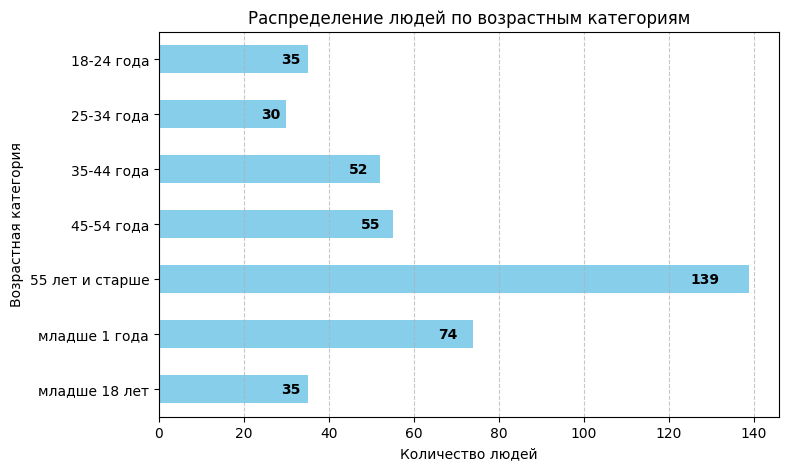

In [49]:
# Строим горизонтальный барчарт
plt.figure(figsize=(8, 5))
bars = age_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Количество людей')
plt.title('Распределение людей по возрастным категориям')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи с числом внутри баров
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width - width*0.05, bar.get_y() + bar.get_height()/2,  # Немного сдвинем влево внутри бара
             int(width), ha='right', va='center', color='black', fontsize=10, fontweight='bold')

plt.show()

# В каком году умерло больше всего людей?

In [50]:
year_death_counts = df[df['Год смерти'].notna()].reset_index(drop=True)
year_death_counts = (
    df['Год смерти']
    .value_counts()
    .sort_index()
)

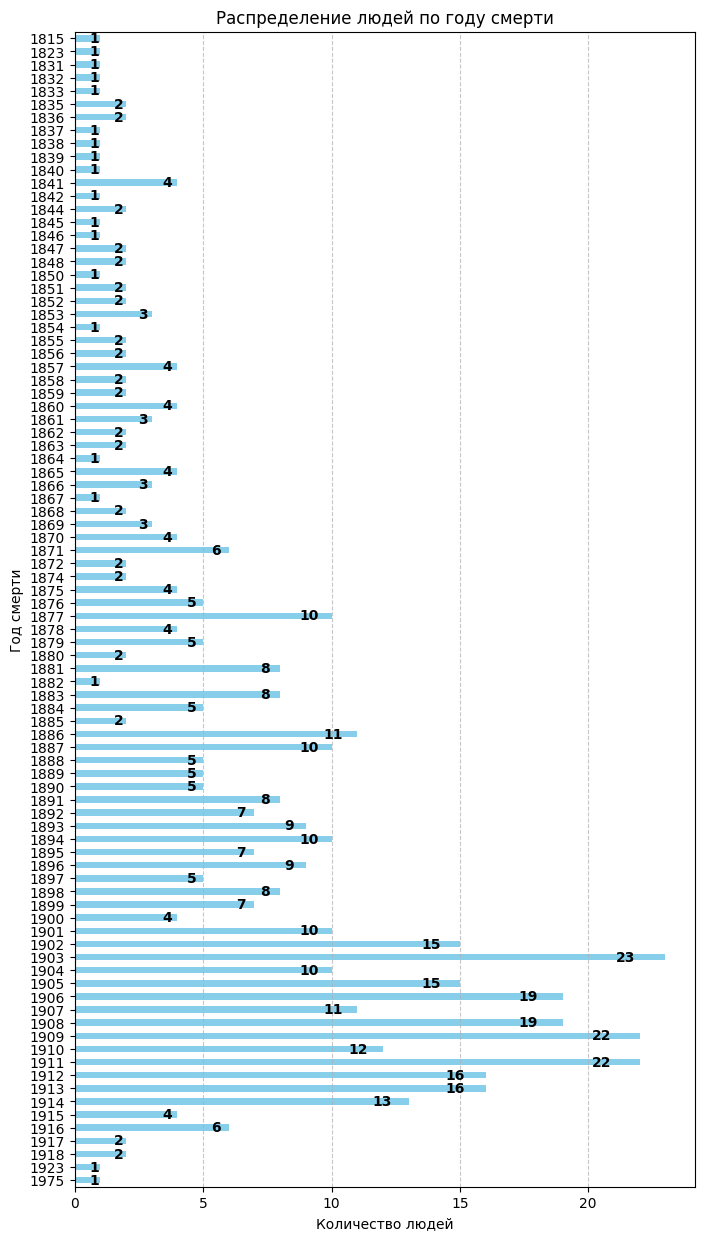

In [51]:
# Строим горизонтальный барчарт
plt.figure(figsize=(8, 15))
bars = year_death_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Количество людей')
plt.title('Распределение людей по году смерти')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи с числом внутри баров
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width - width*0.05, bar.get_y() + bar.get_height()/2,  # Немного сдвинем влево внутри бара
             int(width), ha='right', va='center', color='black', fontsize=10, fontweight='bold')

plt.show()

<Figure size 5000x2000 with 0 Axes>

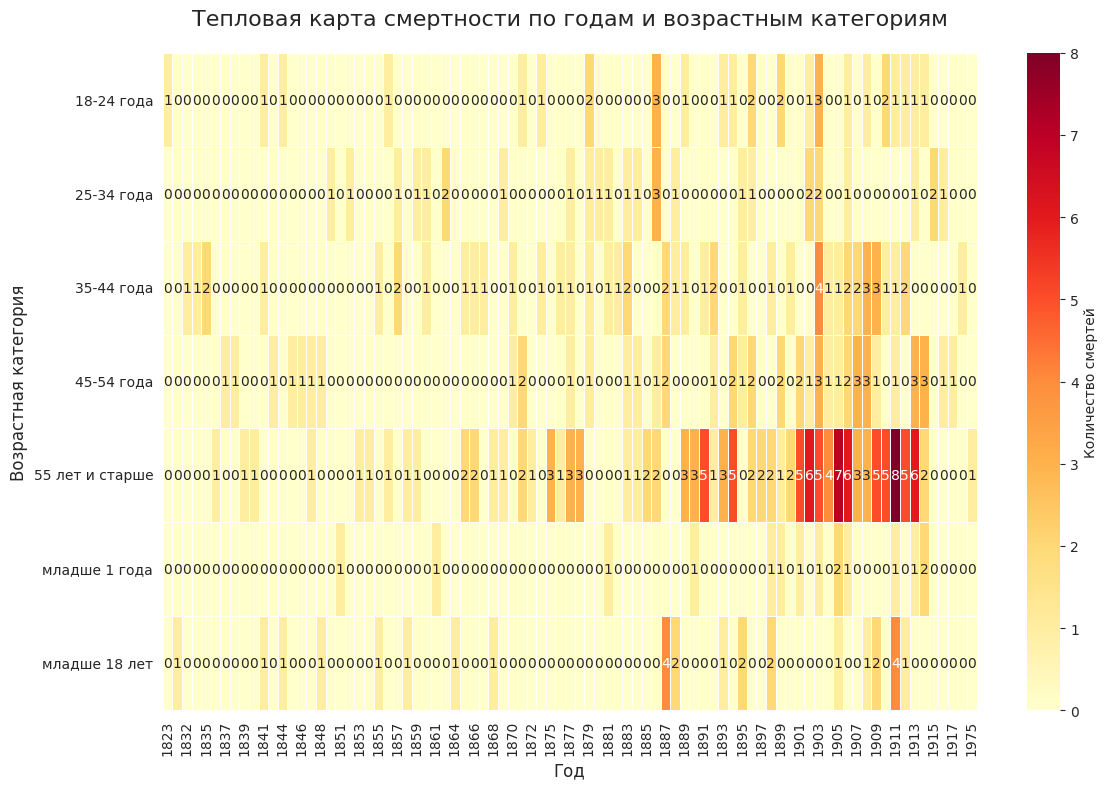

In [63]:
# Подготовка данных
df_plot = df_with_age.dropna(subset=['Год смерти', 'Возрастная категория']).copy()
df_plot['Год смерти'] = df_plot['Год смерти'].astype(int)

# Группировка данных
death_stats = df_plot.groupby(['Год смерти', 'Возрастная категория']).size().unstack().fillna(0)

# Визуализация
plt.figure(figsize=(50, 20))

# Стиль графиков
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(death_stats.columns))

plt.figure(figsize=(12, 8))
sns.heatmap(death_stats.T,
            cmap='YlOrRd',
            annot=True,
            fmt='g',
            linewidths=.5,
            cbar_kws={'label': 'Количество смертей'})
plt.title('Тепловая карта смертности по годам и возрастным категориям', fontsize=16, pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Возрастная категория', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 5000x2000 with 0 Axes>

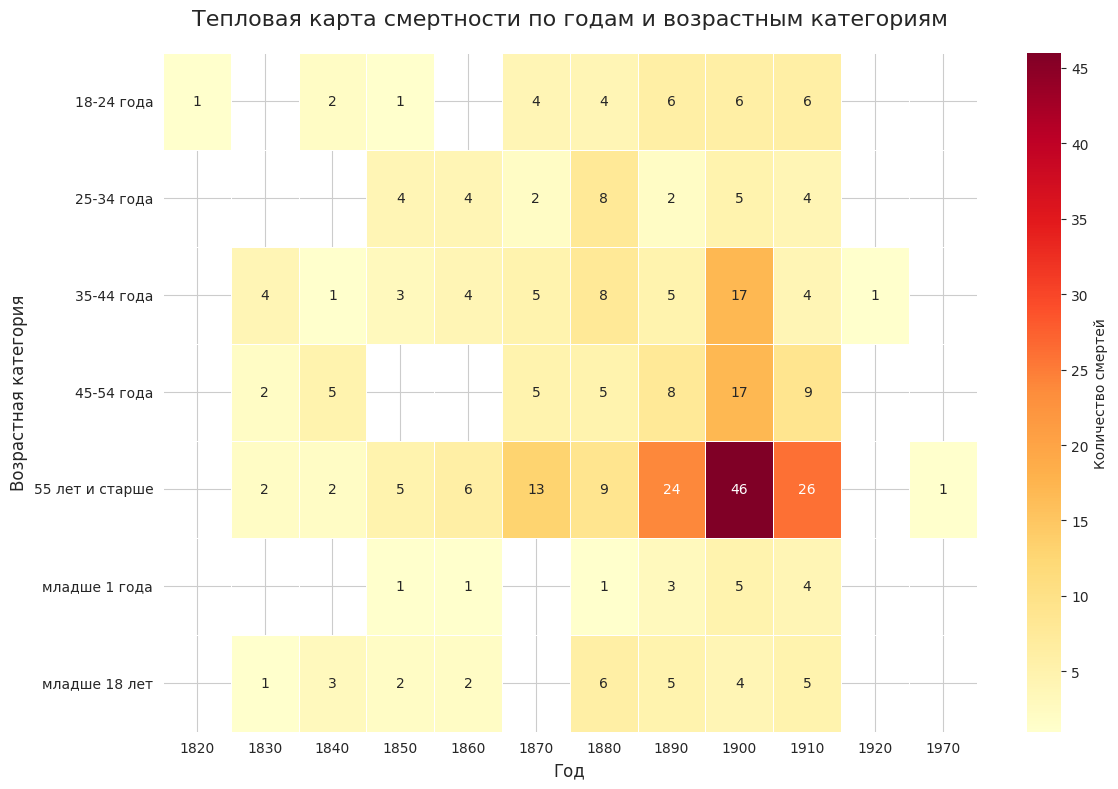

In [66]:
df_plot['Десятилетие'] = (df_plot['Год смерти'] // 10) * 10
# Группировка данных
death_stats_decade = df_plot.groupby(['Десятилетие', 'Возрастная категория']).size().unstack()


# Визуализация
plt.figure(figsize=(50, 20))

# Стиль графиков
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(death_stats.columns))

plt.figure(figsize=(12, 8))
sns.heatmap(death_stats_decade.T,
            cmap='YlOrRd',
            annot=True,
            fmt='g',
            linewidths=.5,
            cbar_kws={'label': 'Количество смертей'})
plt.title('Тепловая карта смертности по годам и возрастным категориям', fontsize=16, pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Возрастная категория', fontsize=12)
plt.tight_layout()
plt.show()

Из википедии: После эпидемии чумы в 1771 году по указу Екатерины II было запрещено хоронить людей в пределах города. В это же время в районе бывшей Ярмарочной площади появляются первые захоронения, а к 1815—1820 году создаётся постоянное кладбище. После постройки в 1834 г. по инициативе купца В. Кузнецова и на средства благотворителей Покровской церкви захоронения стали регулярными, однако до 1880-х годов кладбище оставалось неблагоустроенным.

**И только после расширения церкви и обретения ею приходской автономии начинаются работы по преображению Покровского кладбища: к 1896 году проложены дорожки, построены ограда и ворота, высажены деревья.**

Однако, во времена Советского Союза, помимо разрушения зданий уничтожены многие захоронения. В 1975 году кладбище было закрыто.


Возможно с преображением кладбища стали на нём хоронить чаще.

## Подписывайся на мой блог 😉 https://vk.com/club231378020